In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# going through the info to get some insight into the data
file = open("covtype.info", 'rb')
contents = file.read()
file.close()
print(contents.decode('utf-8'))

The Forest CoverType dataset


1.	Title of Database:

	Forest Covertype data


2.	Sources:

	(a) Original owners of database:
		Remote Sensing and GIS Program
		Department of Forest Sciences
		College of Natural Resources
		Colorado State University
		Fort Collins, CO  80523
		(contact Jock A. Blackard, jblackard 'at' fs.fed.us
		      or Dr. Denis J. Dean, denis.dean 'at' utdallas.edu)

	NOTE:	Reuse of this database is unlimited with retention of 
		copyright notice for Jock A. Blackard and Colorado 
		State University.

	(b) Donors of database:
		Jock A. Blackard (jblackard 'at' fs.fed.us)
		GIS Coordinator
		USFS - Forest Inventory & Analysis
		Rocky Mountain Research Station
		507 25th Street
		Ogden, UT 84401

		Dr. Denis J. Dean (denis.dean 'at' utdallas.edu)
		Professor
		Program in Geography and Geospatial Sciences
		School of Economic, Political and Policy Sciences
		800 West Campbell Rd
		Richardson, TX  75080-3021 
		
		Dr. Charles W. Anderson (anderson 'at' cs.colostate.edu

#### From the info above we see there are 12 measures as variables, out of which, 10 are quantitative variables which includes the first 10 columns and the other two features are:
##### 1. Wilderness area: It is categorical and divided into 4 types namely: i) Rawah (area_1), ii) Neota (area_2), iii) Comanche Peak (area_3), iv) Cache La Poudre (area_4)
##### 2. Soil types: It is also categorical variable and divided into 40 types
#### These two divisions brings up the number of independant columns to 54.
### Lastly our target variable Forest cover type consists of 7 classes, mainly 
##### Type1> spruce/fir, Type2> lodgepole pine, Type3> Ponderosa pine, Type4> cottonwood /willow, Type5> aspen, Type6> douglas-fir, Type7> Krummholz

In [3]:
# Before reading the data lets initialize the columns since there are no headers in the data
columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
           'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

wilderness_area = ["Wilderness_area_" + str(x) for x in range(1, 5)]

soil_types = ['Soil_type_' + str(x+1) for x in range(40)]

columns.extend(wilderness_area)
columns.extend(soil_types)
columns.extend(['Forest_cover_type'])

print(columns)
print(len(columns))

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_area_1', 'Wilderness_area_2', 'Wilderness_area_3', 'Wilderness_area_4', 'Soil_type_1', 'Soil_type_2', 'Soil_type_3', 'Soil_type_4', 'Soil_type_5', 'Soil_type_6', 'Soil_type_7', 'Soil_type_8', 'Soil_type_9', 'Soil_type_10', 'Soil_type_11', 'Soil_type_12', 'Soil_type_13', 'Soil_type_14', 'Soil_type_15', 'Soil_type_16', 'Soil_type_17', 'Soil_type_18', 'Soil_type_19', 'Soil_type_20', 'Soil_type_21', 'Soil_type_22', 'Soil_type_23', 'Soil_type_24', 'Soil_type_25', 'Soil_type_26', 'Soil_type_27', 'Soil_type_28', 'Soil_type_29', 'Soil_type_30', 'Soil_type_31', 'Soil_type_32', 'Soil_type_33', 'Soil_type_34', 'Soil_type_35', 'Soil_type_36', 'Soil_type_37', 'Soil_type_38', 'Soil_type_39', 'Soil_type_40', 'Forest_cover_type']
55


In [4]:
df = pd.read_csv("covtype.data", header=None, names=columns)
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_type_32  Soil_type_33  \
0                                6279  ...             0             0   
1                                6225  ...             0             0   
2                                6121  ...             0             0   
3                                6211  ...             0             0   
4                                6172  ...             0             0   

   Soil_type_34  Soil_type_35  Soil_type_36  Soil_type_37  Soil_type_38  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Soil_type_39  Soil_type_40  Forest_cover_type  
0             0             0                  5  
1             0             0                  5  
2             0             0                  2  
3             0             0                  2  
4             0             0                  5  

[5 rows x 55 columns]

In [5]:
print(df.isnull().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_area_1                     0
Wilderness_area_2                     0
Wilderness_area_3                     0
Wilderness_area_4                     0
Soil_type_1                           0
Soil_type_2                           0
Soil_type_3                           0
Soil_type_4                           0
Soil_type_5                           0
Soil_type_6                           0
Soil_type_7                           0
Soil_type_8                           0
Soil_type_9                           0
Soil_type_10                          0
Soil_type_11                          0


In [6]:
# No missing data inside. Lets check the data types
print(df.dtypes)

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_area_1                     int64
Wilderness_area_2                     int64
Wilderness_area_3                     int64
Wilderness_area_4                     int64
Soil_type_1                           int64
Soil_type_2                           int64
Soil_type_3                           int64
Soil_type_4                           int64
Soil_type_5                           int64
Soil_type_6                           int64
Soil_type_7                           int64
Soil_type_8                           int64
Soil_type_9                     

In [7]:
df.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...   Soil_type_32  \
count  581012.000000                       581012.000000  ...  581012.000000   
mean      142.528263                         1980.291226  ...       0.090392   
std        38.274529                         1324.195210  ...       0.286743   
min         0.000000                            0.000000  ...       0.000000   
25%       119.000000                         1024.000000  ...       0.000000   
50%       143.000000                         1710.000000  ...       0.000000   
75%       168.000000                         2550.000000  ...       0.000000   
max       254.000000                         7173.000000  ...       1.000000   

        Soil_type_33   Soil_type_34   Soil_type_35   Soil_type_36  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.077716       0.002773       0.003255       0.000205   
std         0.267725       0.052584       0.056957       0.014310   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

        Soil_type_37   Soil_type_38   Soil_type_39   Soil_type_40  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.000513       0.026803       0.023762       0.015060   
std         0.022641       0.161508       0.152307       0.121791   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       Forest_cover_type  
count      581012.000000  
mean            2.051471  
std             1.396504  
min             1.000000  
25%             1.000000  
50%             2.000000  
75%             2.000000  
max      

#### An overview and descriptive statistics shows the data is clean and devoid of any null values and all features are numeric.
#### The wilderness area and soil types are one-hot encoded

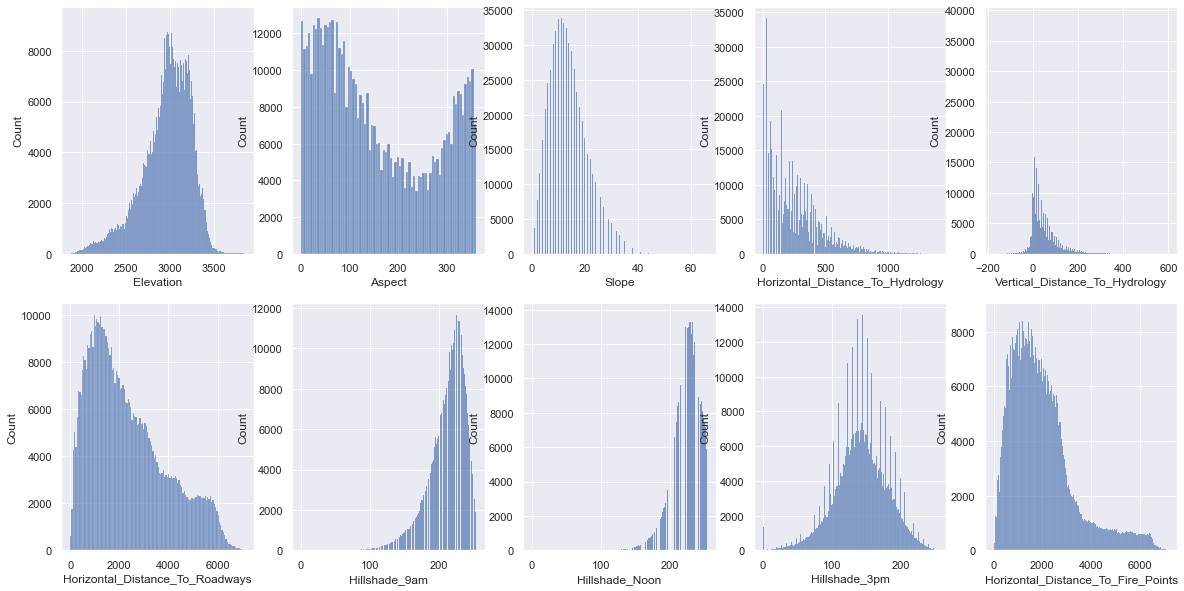

In [8]:
# check the continuous variables distribution
plt.figure(figsize=(20, 10))

for i, column in enumerate(columns[:10]):
    ax = plt.subplot(2, 5, i+1)
    sns.histplot(df[column])
plt.show()

#### There seems to be some negative values in the column 'vertical_distance_to_hydrology'. Probably because of the fact that there are elevation involved.
#### Other than that Aspect variable all looks quite normally distributed. Although there may be some outliers

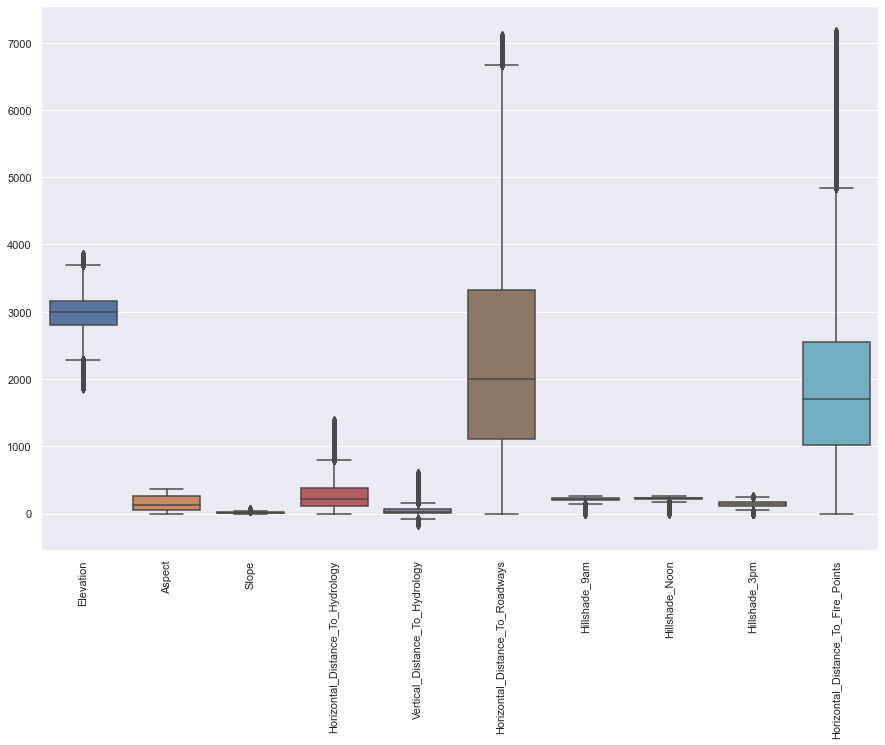

In [9]:
# Identify the variables with outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[columns[:10]])
plt.xticks(rotation=90)
plt.show()

#### Horizontal distance to Roadways and Fire points seems to have the highest range [0-7173]. Since the removal of datapoints might remove the essence and patterns of  the dataset, useful for ML prediction, lets just remove the extreme outliers and see the results
#### After some research, its evident that the variable vertical distance to hydrology with negative values could be because of the elevation where the water supply might be below the datapoint, or could even be below sea-level so the values stays.

In [10]:
# Lets check for outliers more than and less than 3 times the IQR for detecting extreme outliers only
def outlier_detection(df, col_name):
    first_quartile = df[col_name].quantile(0.25)
    third_quartile = df[col_name].quantile(0.75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [11]:
for column in columns[:10]:
    if outlier_detection(df, column)[2] > 0:
        print("There are {} outliers in the column {}".format(outlier_detection(df, column)[2], column))

There are 275 outliers in the column Slope
There are 414 outliers in the column Horizontal_Distance_To_Hydrology
There are 5339 outliers in the column Vertical_Distance_To_Hydrology
There are 1027 outliers in the column Hillshade_9am
There are 1191 outliers in the column Hillshade_Noon
There are 10 outliers in the column Horizontal_Distance_To_Fire_Points


#### Hillshade columns have RGB representations between (0-255) range according to the shade at specific time so the columns are already fixed.
#### Lets remove the outliers

In [12]:
df_cleaned =  df[(df['Slope'] > outlier_detection(df, 'Slope')[0]) & (df['Slope'] < outlier_detection(df, 'Slope')[1])].copy()
df_cleaned =  df_cleaned[(df_cleaned['Vertical_Distance_To_Hydrology'] > outlier_detection(df_cleaned, 'Vertical_Distance_To_Hydrology')[0]) & (df_cleaned['Vertical_Distance_To_Hydrology'] < outlier_detection(df_cleaned, 'Vertical_Distance_To_Hydrology')[1])]
df_cleaned =  df_cleaned[(df_cleaned['Horizontal_Distance_To_Hydrology'] > outlier_detection(df_cleaned, 'Horizontal_Distance_To_Hydrology')[0]) & (df_cleaned['Horizontal_Distance_To_Hydrology'] < outlier_detection(df_cleaned, 'Horizontal_Distance_To_Hydrology')[1])]
df_cleaned =  df_cleaned[(df_cleaned['Horizontal_Distance_To_Fire_Points'] > outlier_detection(df_cleaned, 'Horizontal_Distance_To_Fire_Points')[0]) & (df_cleaned['Horizontal_Distance_To_Fire_Points'] < outlier_detection(df_cleaned, 'Horizontal_Distance_To_Fire_Points')[1])]
df_cleaned.describe()

Elevation         Aspect          Slope  \
count  574907.000000  574907.000000  574907.000000   
mean     2957.362820     155.356172      14.031748   
std       279.018205     111.817603       7.420223   
min      1859.000000       0.000000       0.000000   
25%      2807.000000      58.000000       9.000000   
50%      2995.000000     127.000000      13.000000   
75%      3162.000000     259.000000      18.000000   
max      3858.000000     360.000000      44.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     574907.000000                   574907.000000   
mean                         264.009461                       43.834998   
std                          205.119436                       52.259147   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          216.000000                       29.000000   
75%                          379.000000                       67.000000   
max                         1191.000000                      254.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    574907.000000  574907.000000   574907.000000   
mean                       2351.922452     212.353000      223.404331   
std                        1561.684973      26.478351       19.595854   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     199.000000      213.000000   
50%                        1998.000000     218.000000      226.000000   
75%                        3331.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...   Soil_type_32  \
count  574907.000000                       574907.000000  ...  574907.000000   
mean      142.434328                         1983.290355  ...       0.090242   
std        38.011085                         1328.276358  ...       0.286529   
min         0.000000                            0.000000  ...       0.000000   
25%       119.000000                         1022.000000  ...       0.000000   
50%       143.000000                         1714.000000  ...       0.000000   
75%       168.000000                         2553.000000  ...       0.000000   
max       252.000000                         7145.000000  ...       1.000000   

        Soil_type_33   Soil_type_34   Soil_type_35   Soil_type_36  \
count  574907.000000  574907.000000  574907.000000  574907.000000   
mean        0.076106       0.002748       0.003289       0.000207   
std         0.265168       0.052352       0.057257       0.014386   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

        Soil_type_37   Soil_type_38   Soil_type_39   Soil_type_40  \
count  574907.000000  574907.000000  574907.000000  574907.000000   
mean        0.000518       0.027018       0.023774       0.013113   
std         0.022761       0.162137       0.152345       0.113761   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       Forest_cover_type  
count      574907.000000  
mean            2.047256  
std             1.389422  
min             1.000000  
25%             1.000000  
50%             2.000000  
75%             2.000000  
max      

#### Now lets look at the distribution of the cover types over the dataset

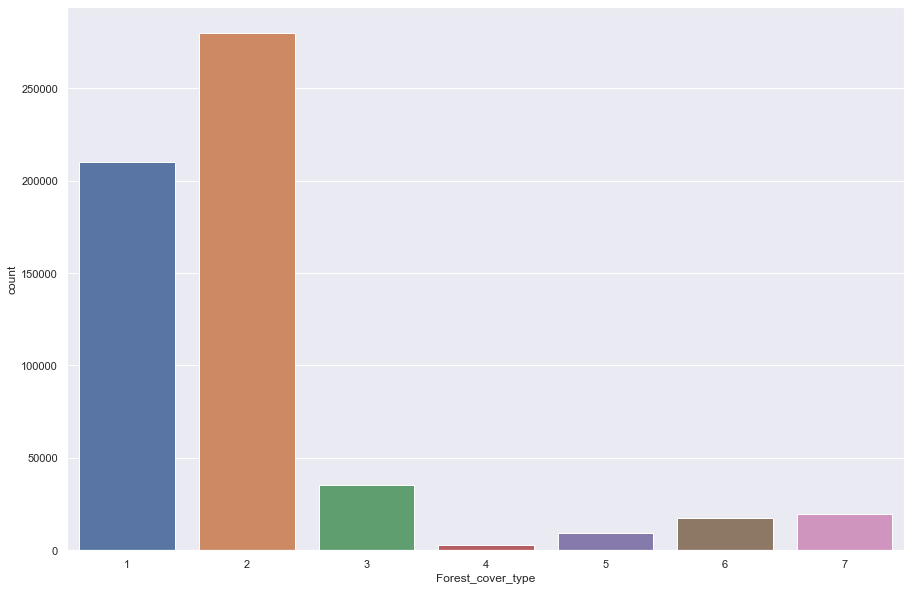

In [13]:
# covers = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
plt.figure(figsize=(15, 10))
sns.countplot(x='Forest_cover_type', data=df_cleaned)
plt.show()

#### Also check the other variables

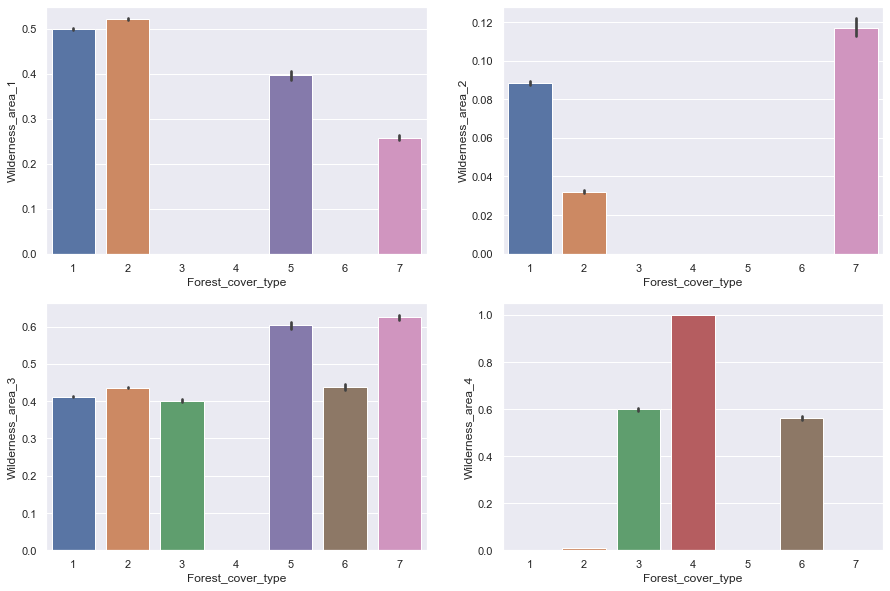

In [14]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns[10:14]):
    ax = plt.subplot(2, 2, i+1)
    sns.barplot(x='Forest_cover_type', y=column, data=df_cleaned)
plt.show()

#### Lets transfer this into a single plot

In [15]:
df_wilderness = pd.DataFrame()

df_wilderness['wilderness_class'] = df_cleaned[columns[10:14]].idxmax(1) # reverse one-hot encoding

df_wilderness['Forest_cover_type'] = df_cleaned['Forest_cover_type'].values

df_wilderness.head()

wilderness_class  Forest_cover_type
0  Wilderness_area_1                  5
1  Wilderness_area_1                  5
2  Wilderness_area_1                  2
3  Wilderness_area_1                  2
4  Wilderness_area_1                  5

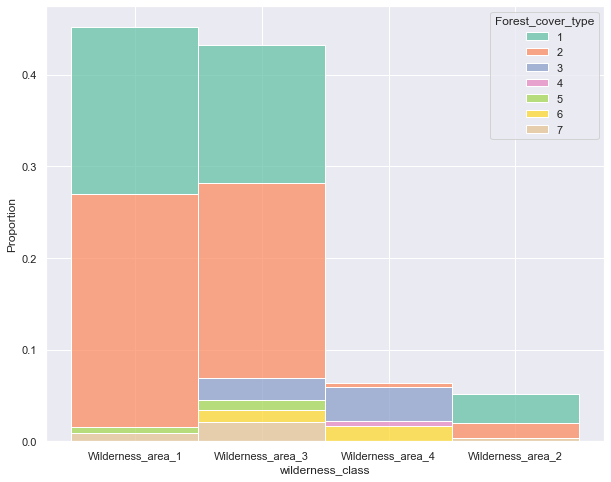

In [16]:
plt.figure(figsize=(10, 8))
sns.histplot(binwidth=0.5, x='wilderness_class', hue='Forest_cover_type', data=df_wilderness, stat='proportion', multiple='stack', palette='Set2')
plt.show()

#### Its quite evident that Rawah(wilderness_area_1) and Comanche peak(wilderness_area_3) are the most observed areas which are covered mainly with *Spruce/fir* and *Lodgepole Pine* and also some *Ponderosa Pine*, *Aspen*, *douglus-fir* and *krummholz*.
#### Also hilly Neota(wilderness_area_2) is covered with the first two categories and a little bit of *krummholz*.
#### Cache La Poudre(wilderness_area_4) basically consists of *Ponderosa Pine* and *douglas-fir* and also the only place to sustain *cottonwood/willow* cover of the four.
### This feature is good distinctive feature to predict cover types

In [17]:
# Lets also check the distribution of soil types
df_soil_types = pd.DataFrame()

df_soil_types['Soil_class'] = df_cleaned[columns[14:54]].idxmax(1)

df_soil_types['Forest_cover_type'] = df_cleaned['Forest_cover_type'].values

df_soil_types.head()

Soil_class  Forest_cover_type
0  Soil_type_29                  5
1  Soil_type_29                  5
2  Soil_type_12                  2
3  Soil_type_30                  2
4  Soil_type_29                  5

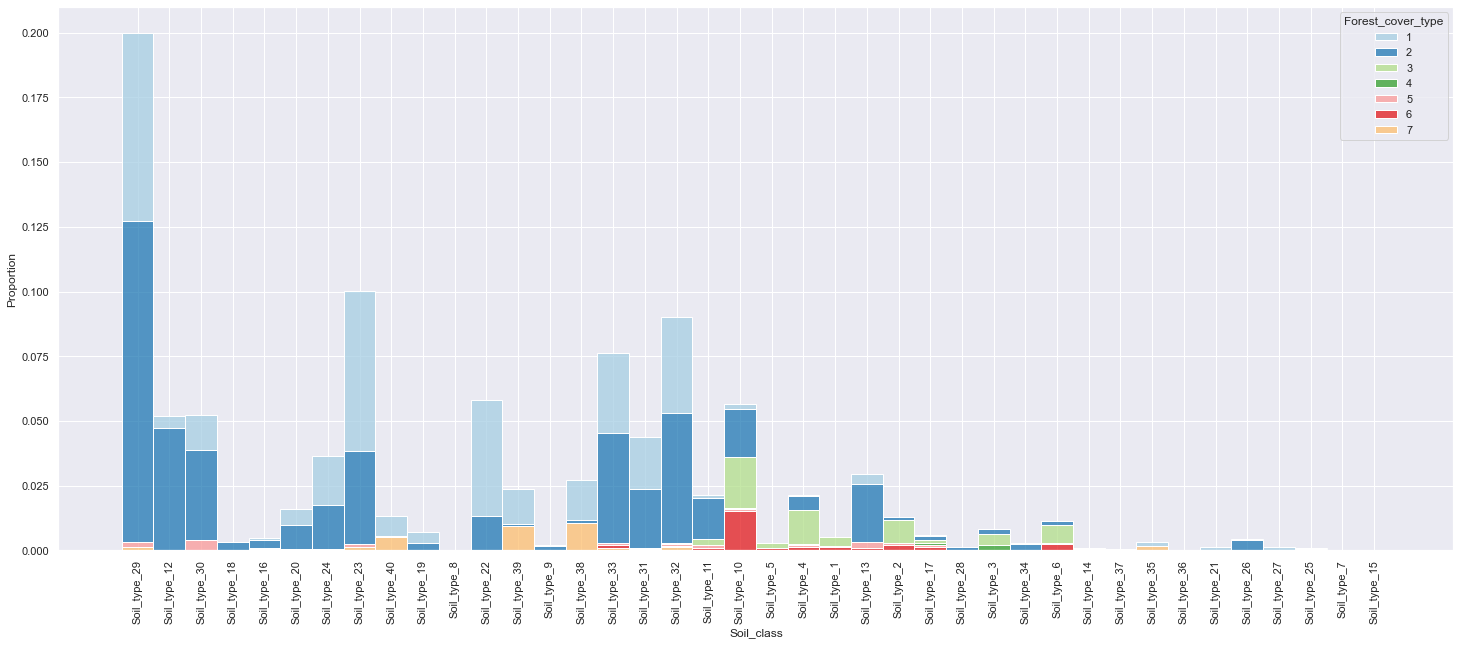

In [18]:
plt.figure(figsize=(25, 10))
sns.histplot(x='Soil_class', hue='Forest_cover_type', stat='proportion', palette='Paired', multiple='stack', data=df_soil_types)
plt.xticks(rotation=90)
plt.show()

#### We can clearly see the distribution of different  soil types asociated with different cover types. The most common types of soil found seems to be Leighcan, Catamount, Como, Bullwark etc. in the areas covered with spruce/fir and lodgepole pine.
##### Cover type 1 and 2 can be seen growing in mostly all types of soil.
##### Some soil types are pretty invisible.

In [19]:
# plot relationship of soil type and cover type among different wilderness areas
df_soil_wilderness_cover = pd.DataFrame()
df_soil_wilderness_cover['Soil_class'] = [soil.split("_")[-1] for soil in df_soil_types['Soil_class'].values]
df_soil_wilderness_cover['Wlderness_class'] = df_wilderness['wilderness_class'].values
df_soil_wilderness_cover['Forest_cover_type'] = df_wilderness['Forest_cover_type'].values
df_soil_wilderness_cover['Soil_class'] = df_soil_wilderness_cover['Soil_class'].astype('int64')
df_soil_wilderness_cover.head()

Soil_class    Wlderness_class  Forest_cover_type
0          29  Wilderness_area_1                  5
1          29  Wilderness_area_1                  5
2          12  Wilderness_area_1                  2
3          30  Wilderness_area_1                  2
4          29  Wilderness_area_1                  5

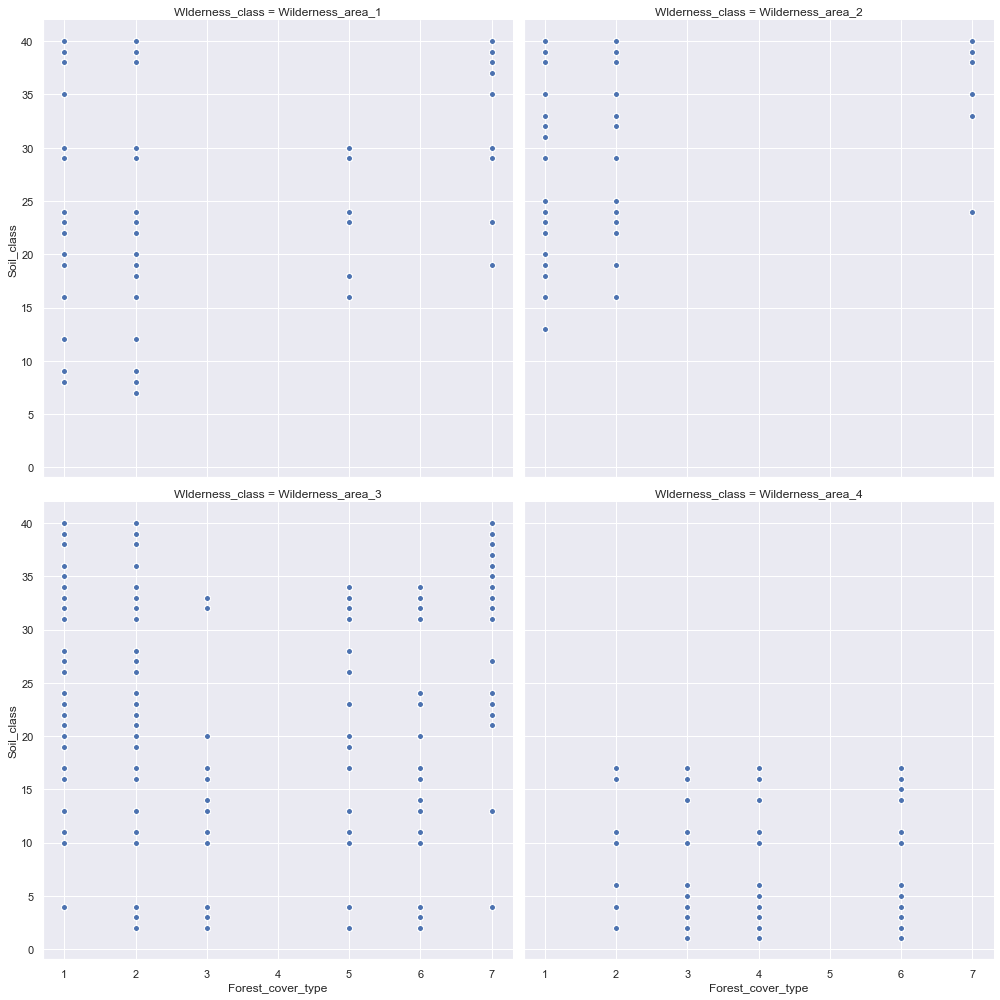

In [20]:

g = sns.FacetGrid(df_soil_wilderness_cover, col='Wlderness_class', col_wrap=2, height=7, col_order=columns[10:14])
g.map(plt.scatter, 'Forest_cover_type', 'Soil_class', edgecolor='w', color='b')


##### Wilderness Area 3 is more diverse in soil type and cover type.
##### Only soil types 1 through 20 is represented in Wilderness Area 4, thus cover types in that area grew with them.
##### Cover type 7 seems to grow with soil types 24 through 40.
##### Cover Type 3 loves soil type 0 through 20.
##### Cover type 4 grows only in Wilderness area 4 with soil types 0 through 16
##### Cover Type 1 and 2 can grow with any soil type.

<function matplotlib.pyplot.show(close=None, block=None)>

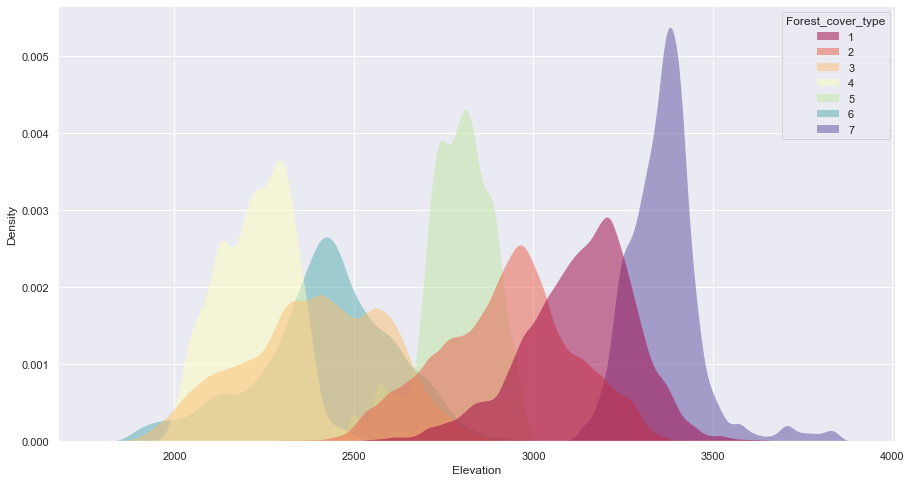

In [21]:
# plotting the elevation variable
plt.figure(figsize=(15, 8))
sns.kdeplot(x='Elevation', hue='Forest_cover_type', palette='Spectral', alpha=0.5, linewidth=0, common_norm=False, data=df, fill=True)
plt.show

#### Elevation seems to be normally distributed feature across types of cover. There are some class seperations which can be seen.

### Distibution and relation between the continous variables

In [20]:
# correlation between two variables
def corr_coef(x, y, **kwargs):
    coef_ = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(coef_), xy=(.2, .8), xycoords=ax.transAxes, size=20)

Time taken: 962.7141196727753


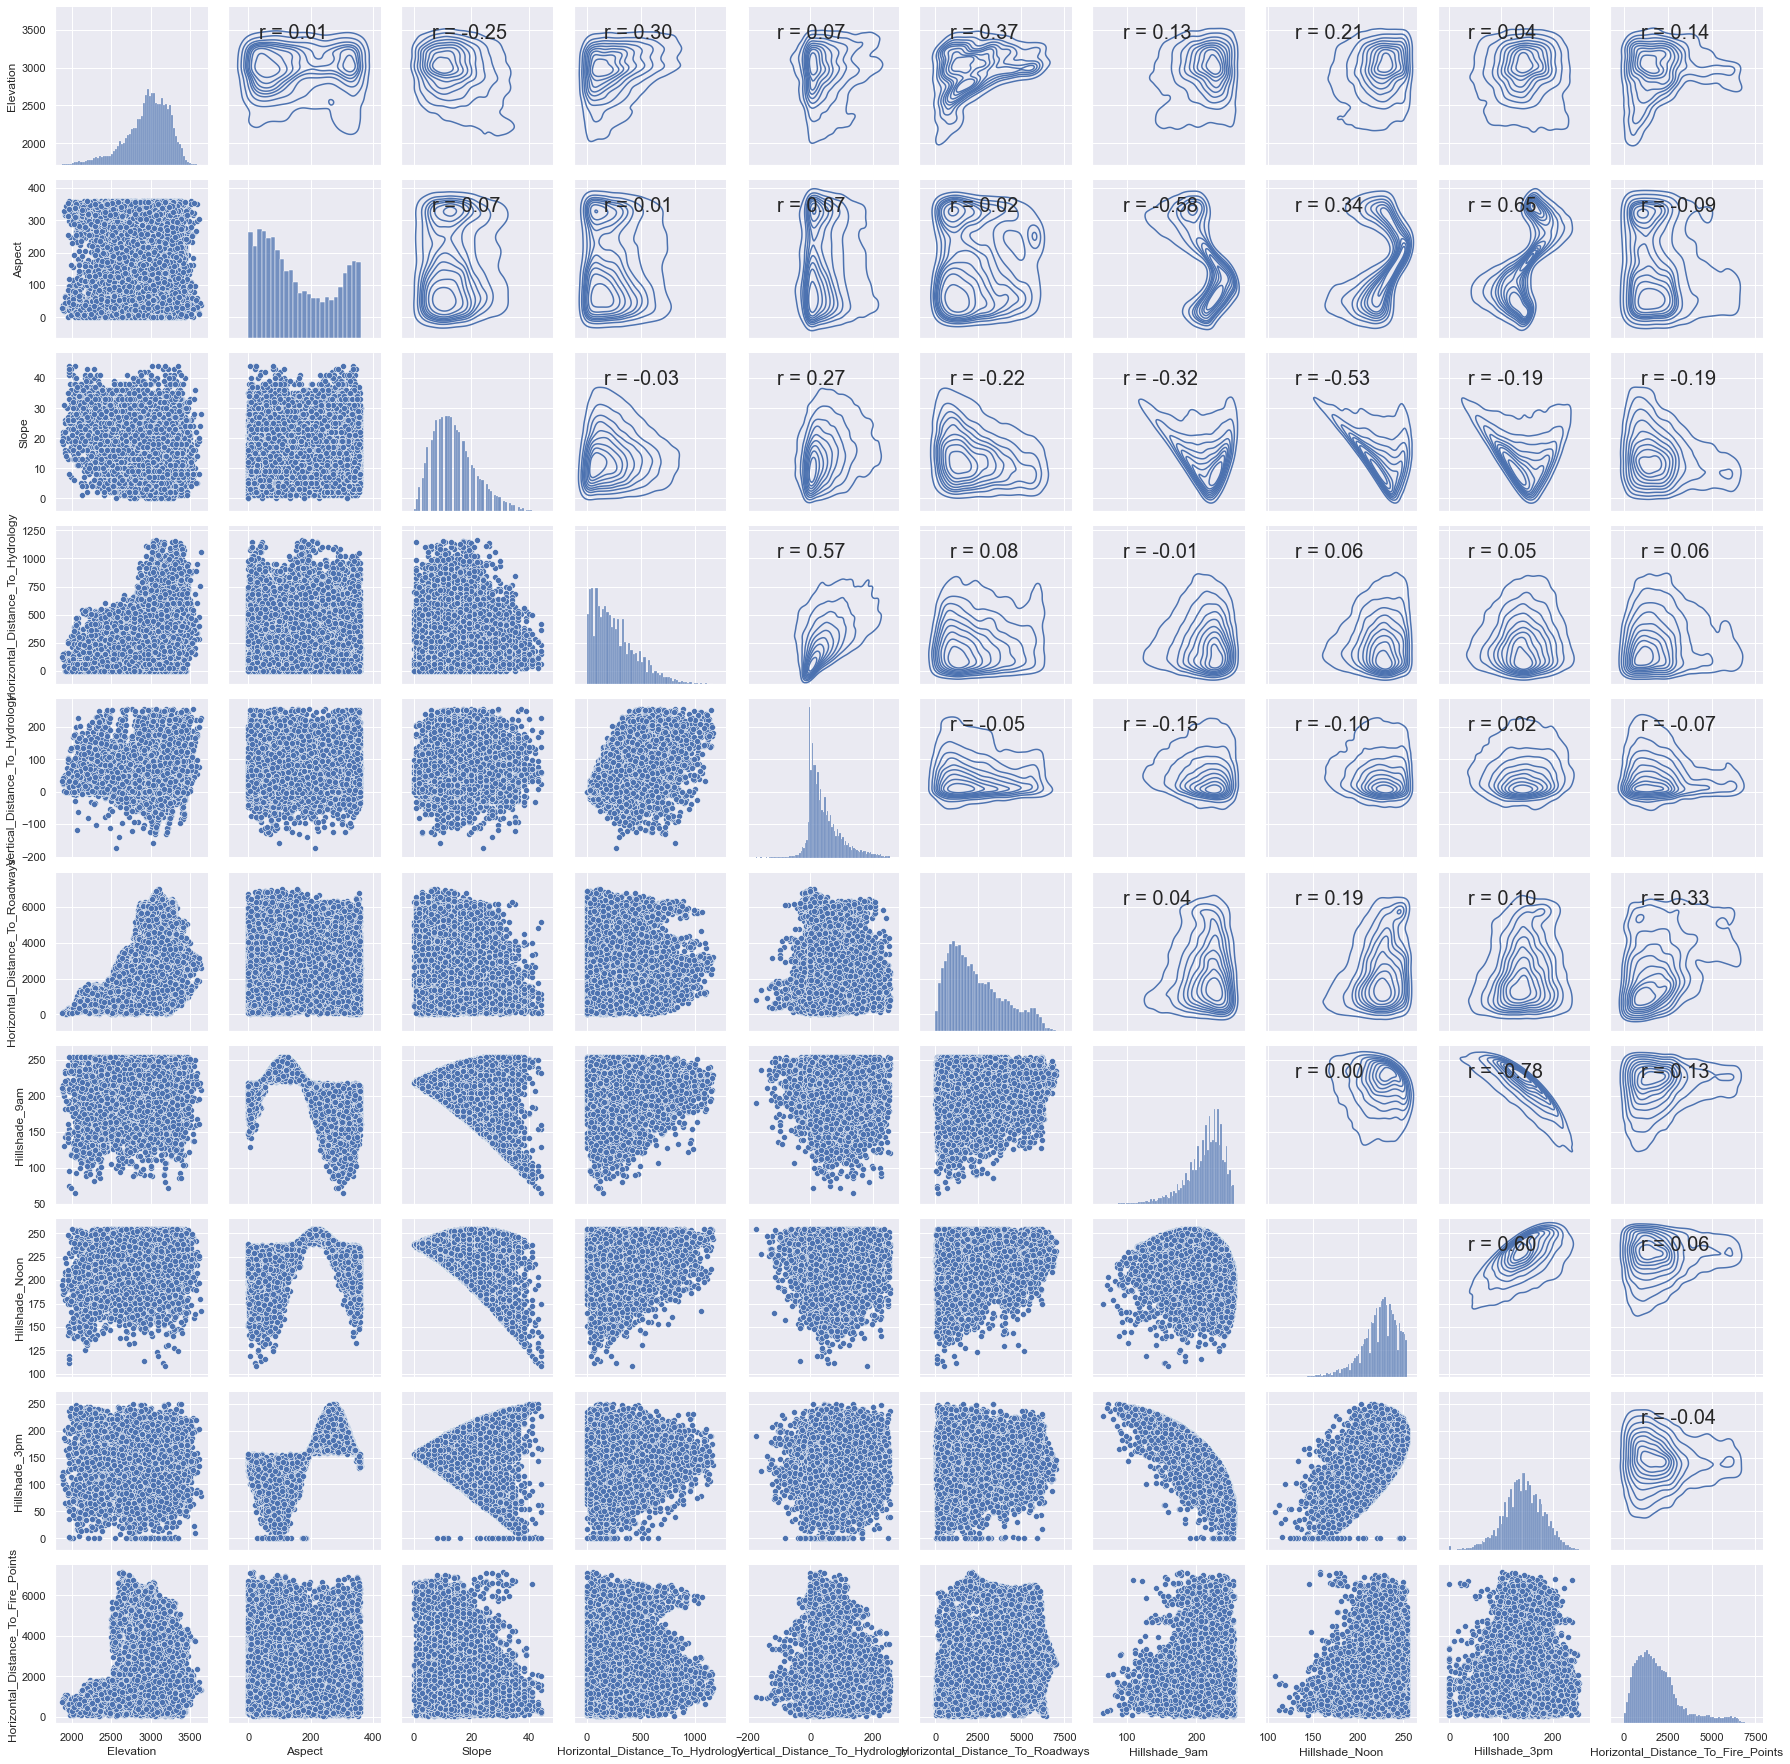

In [49]:
import time
start = time.time()
grid = sns.PairGrid(df_cleaned[columns[:10]].sample(20000))

# upper is correlation and kde plot
grid.map_upper(corr_coef)
grid.map_upper(sns.kdeplot)

# diagonal is histogram
grid.map_diag(sns.histplot)

#lower is scatterplot
grid.map_lower(sns.scatterplot)
finish = time.time()
print("Time taken: " + str(finish - start))

In [50]:
grid.savefig("pairplot.png")
plt.clf() # Clean parirplot figure from sns

<Figure size 432x288 with 0 Axes>

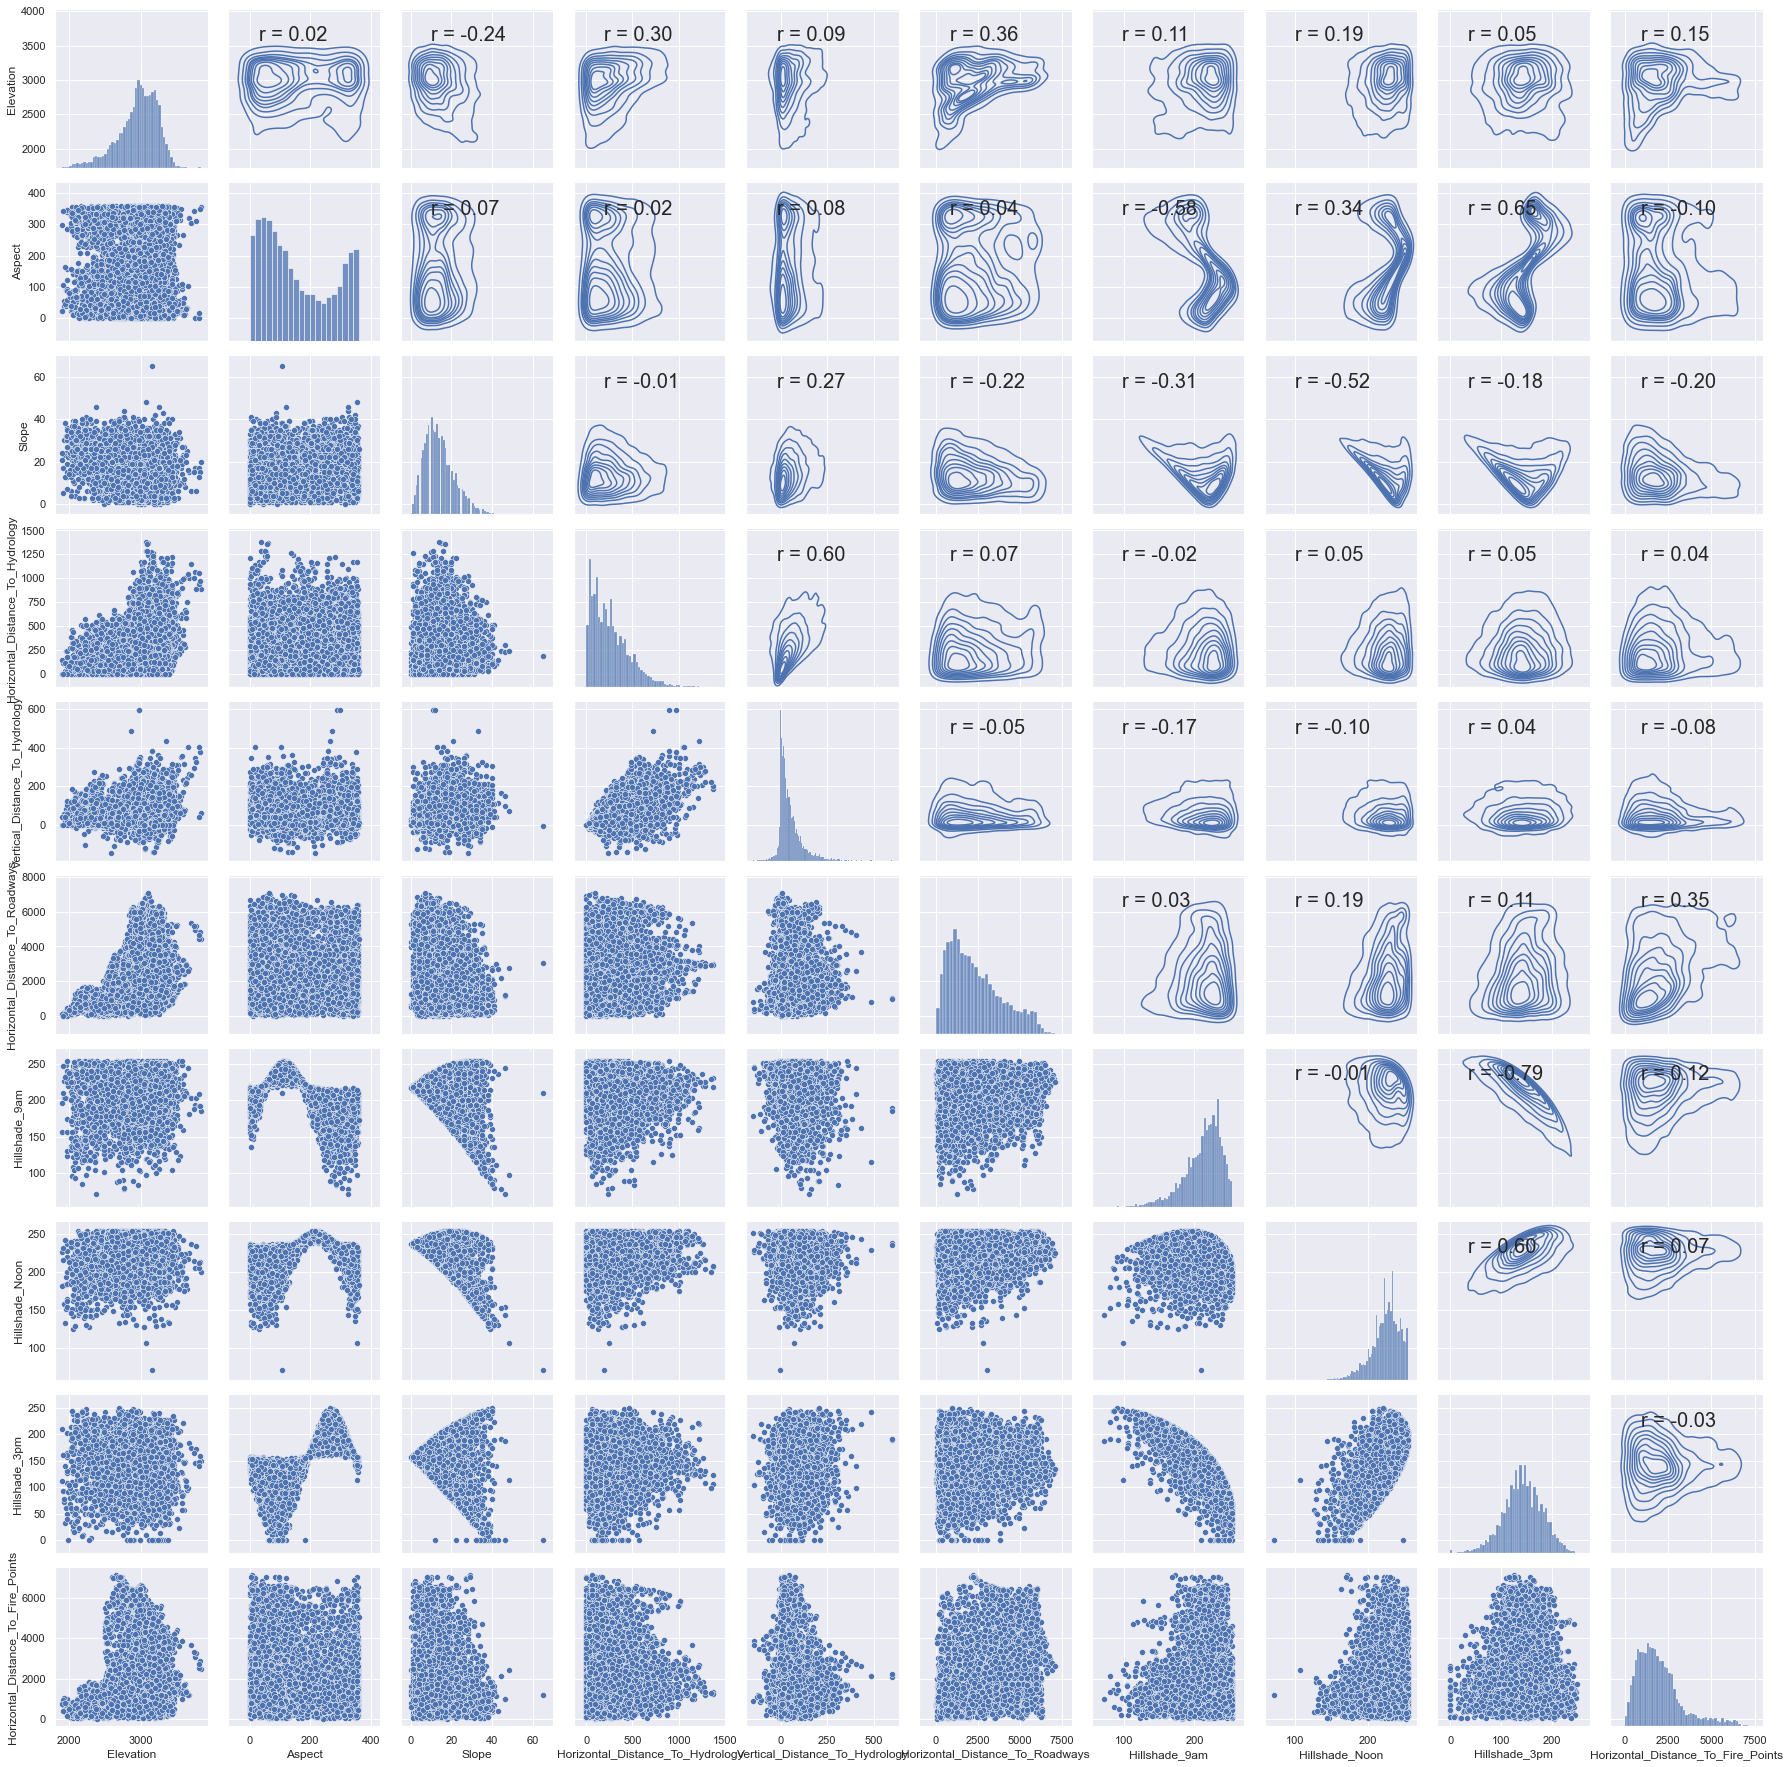

In [24]:
from IPython.display import Image
Image(filename='pairplot.png') # Show pairplot as image

#### Distribution:
    hillshade 9am and hillshade noon have left skewed distribution
    Horizontal_Distance_To_Firepoints, Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Hydrology has right skew
    elevation, hillside3pm has normal distribution
#### Relationships:
    Aspect seems to have some positive relation with hillshade3pm and hillshade_noon variables
    Slope seems to have negative relation with the 3 hillshade variables, and some relation with distances to hydrology
    As expected Hillshade_9am is highly colinear with hillshade_3pm and Hillshade_noon and hillshade_3pm are also colinear
    Horizontal_distance_to_hydrology and Vertical_distance_to_hydrology obviously shows positive trend
    Elevation seems to have some positive trend with horizontal distance to hydrology, roadways,firepoints and negative to slope
#### Collinear relations:
    Some significant collinear features are:
        Aspect with Hillshade_3pm
        Aspect with Hillshade_9am
        Slope with Hillshade_noon
        Horizontal with Vertical distance to hydrology
        Hillshade_9am with Hillshade_3pm
        Hillshade_noon with Hillshade_3pm
##### Above plot is made with just 20000 samples as including all the samples would take humongous amount of time considering my decade-old  processor.
    

### *Visualizing some collinear features*

In [22]:
def visualize(x, y, hue = "Forest_cover_type", data = df_cleaned):
    sns.scatterplot(x = x, y = y, hue = hue, data = data, hue_norm = (0, 8), palette = "Set1")
    plt.title(x + " vs " + y, size = 12)

E:\Users\SOUVIK\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


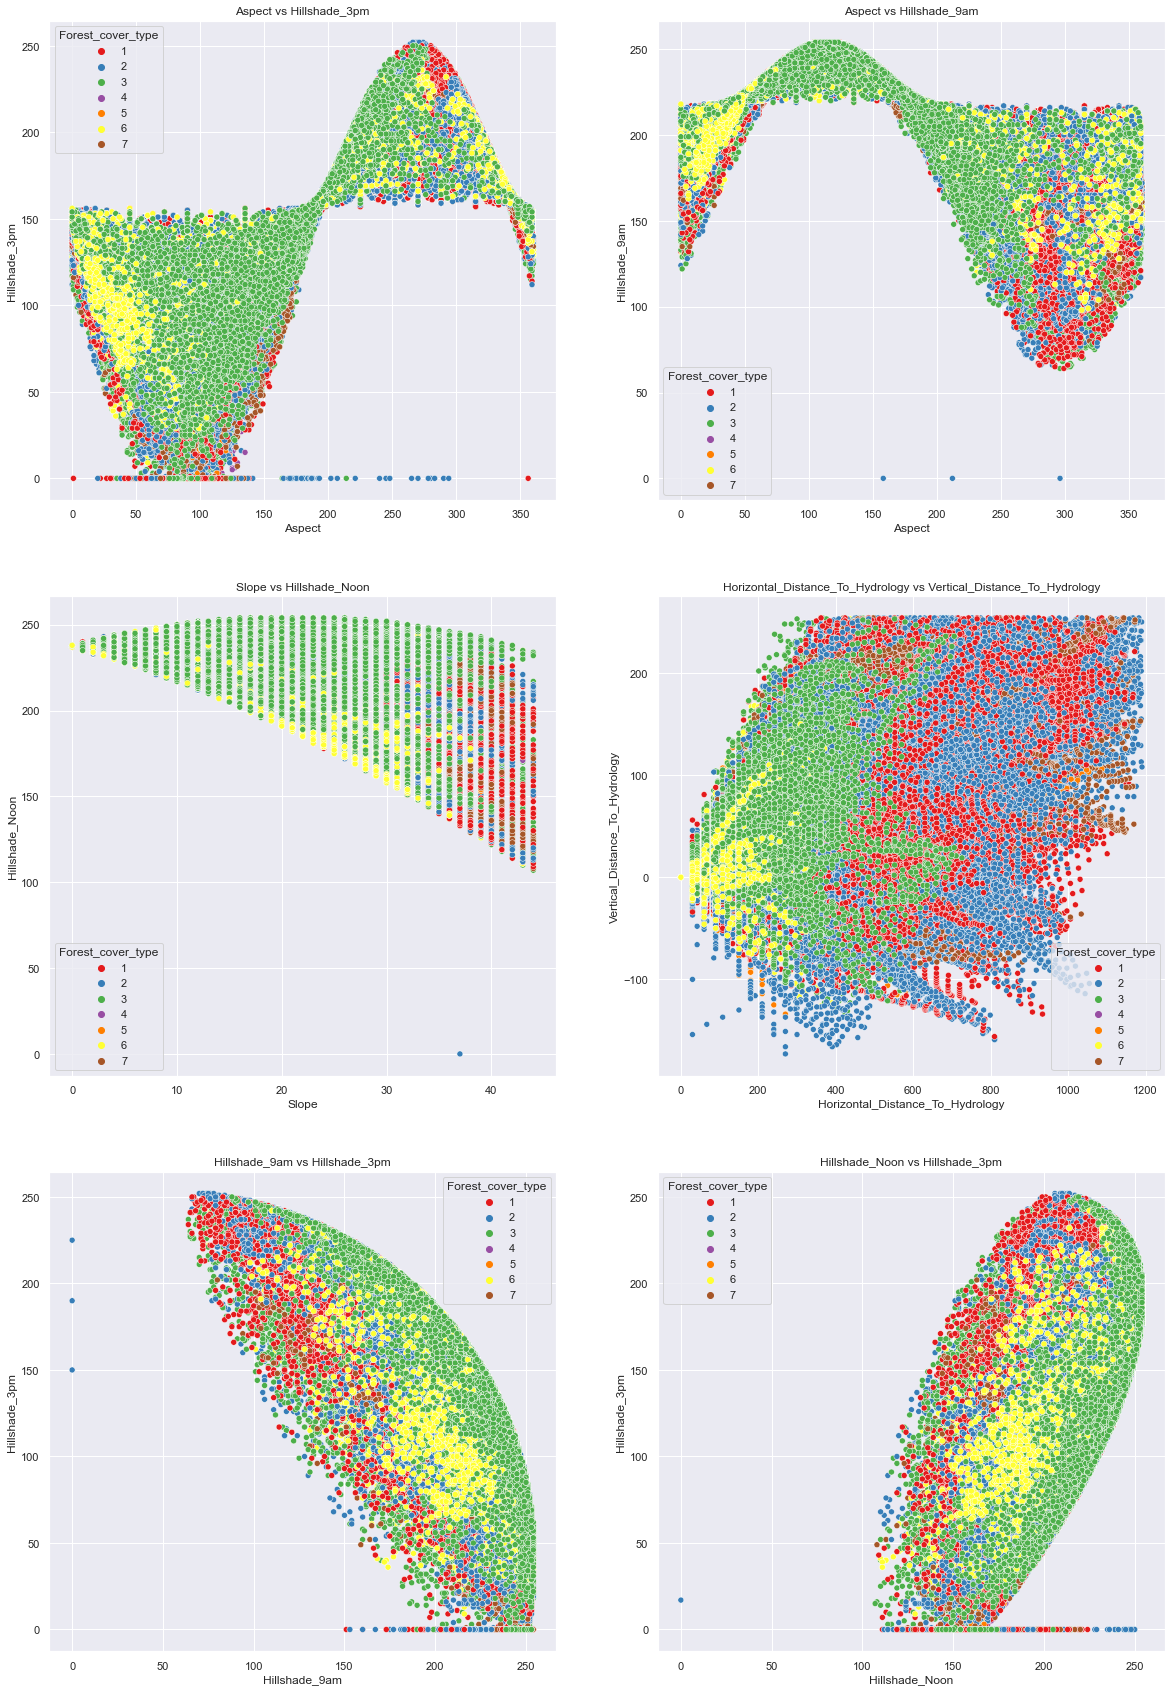

In [23]:
plt.figure(figsize=(20, 30))

plt.subplot(3, 2, 1)
visualize('Aspect', 'Hillshade_3pm')

plt.subplot(3, 2, 2)
visualize('Aspect', 'Hillshade_9am')

plt.subplot(3, 2, 3)
visualize('Slope', 'Hillshade_Noon')

plt.subplot(3, 2, 4)
visualize('Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology')

plt.subplot(3, 2, 5)
visualize('Hillshade_9am', 'Hillshade_3pm')

plt.subplot(3, 2, 6)
visualize('Hillshade_Noon', 'Hillshade_3pm')

plt.show()

##### One variable from Hillshade columns will be dropped when determining the training set. It can be determined using pearson coefficient with the label

Text(0.5, 1.05, 'Pearson Correlation of All Features')

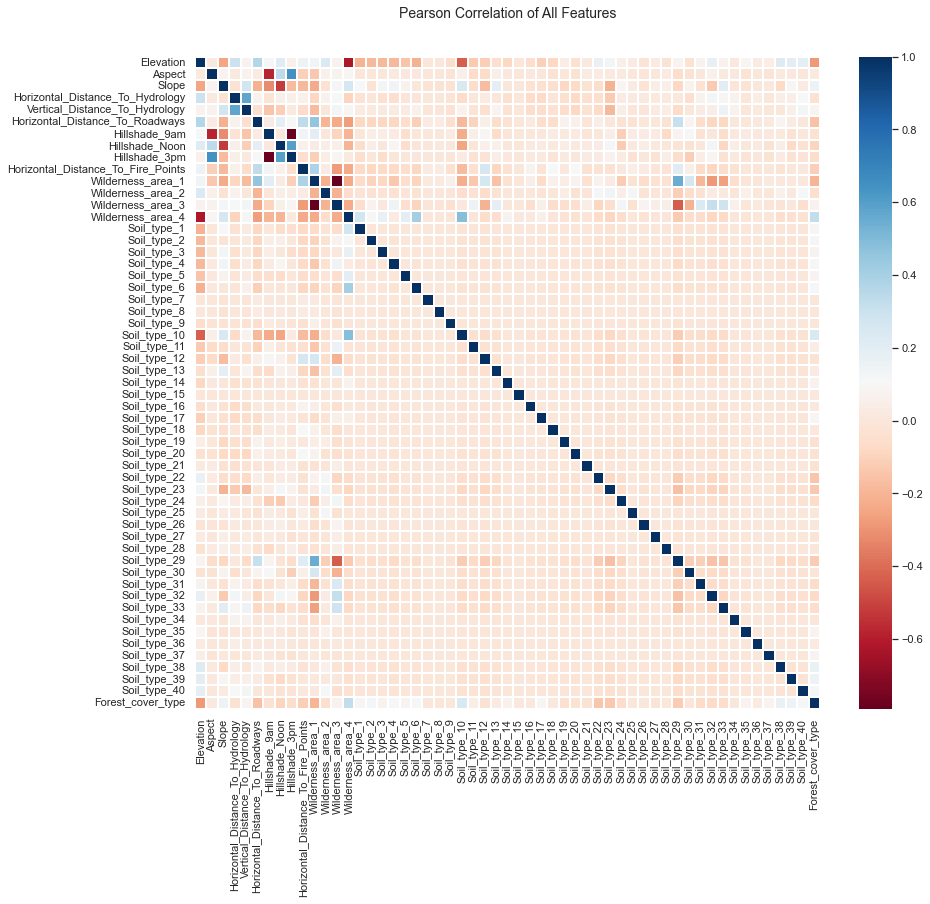

In [24]:
plt.figure(figsize=(14,12))

# plotting heatmap
colormap = plt.cm.RdBu
sns.heatmap(df_cleaned.corr(),linewidths=0.1,vmax=1.0,
            square=False, cmap=colormap, linecolor='white', annot=False)
plt.title('Pearson Correlation of All Features', y=1.05, size=14)

##### None of the features have much significant effect on determining the forest cover type
##### Interestingly soil type 29, 22, 23, 10 of  the 40 soil types seems to affect the cover type. Thats 1.4%. Converting the soil types to a single column.

In [25]:
df_soil_types['Soil_type'] = [soil.split("_")[-1] for soil in df_soil_types['Soil_class'].tolist()]
df_soil_types.head()

Soil_class  Forest_cover_type Soil_type
0  Soil_type_29                  5        29
1  Soil_type_29                  5        29
2  Soil_type_12                  2        12
3  Soil_type_30                  2        30
4  Soil_type_29                  5        29

In [96]:
df_cleaned.loc[:, 'Soil_type'] = [soil.split("_")[-1] for soil in df_soil_types['Soil_class'].tolist()]
df_cleaned.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_type_33  Soil_type_34  \
0                                6279  ...             0             0   
1                                6225  ...             0             0   
2                                6121  ...             0             0   
3                                6211  ...             0             0   
4                                6172  ...             0             0   

   Soil_type_35  Soil_type_36  Soil_type_37  Soil_type_38  Soil_type_39  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Soil_type_40  Forest_cover_type  Soil_type  
0             0                  5         29  
1             0                  5         29  
2             0                  2         12  
3             0                  2         30  
4             0                  5         29  

[5 rows x 56 columns]

In [97]:
df_cleaned_w_single_soil_type = df_cleaned.drop(columns[14:54], axis=1).copy()
df_cleaned_w_single_soil_type['Soil_type'] = df_cleaned_w_single_soil_type['Soil_type'].astype('int64')
df_cleaned_w_single_soil_type.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_area_1  Wilderness_area_2  \
0                                6279                  1                  0   
1                                6225                  1                  0   
2                                6121                  1                  0   
3                                6211                  1                  0   
4                                6172                  1                  0   

   Wilderness_area_3  Wilderness_area_4  Forest_cover_type  Soil_type  
0                  0                  0                  5         29  
1                  0                  0                  5         29  
2                  0                  0                  2         12  
3                  0                  0                  2         30  
4                  0                  0                  5         29

In [98]:
df_cleaned_w_single_soil_type.drop(['Forest_cover_type'], axis=1, inplace=True)
df_cleaned_w_single_soil_type['Forest_cover_type'] = df_cleaned['Forest_cover_type'].values
df_cleaned_w_single_soil_type.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_area_1  Wilderness_area_2  \
0                                6279                  1                  0   
1                                6225                  1                  0   
2                                6121                  1                  0   
3                                6211                  1                  0   
4                                6172                  1                  0   

   Wilderness_area_3  Wilderness_area_4  Soil_type  Forest_cover_type  
0                  0                  0         29                  5  
1                  0                  0         29                  5  
2                  0                  0         12                  2  
3                  0                  0         30                  2  
4                  0                  0         29                  5

Text(0.5, 1.0, 'Pearson Correlation with single soil type column')

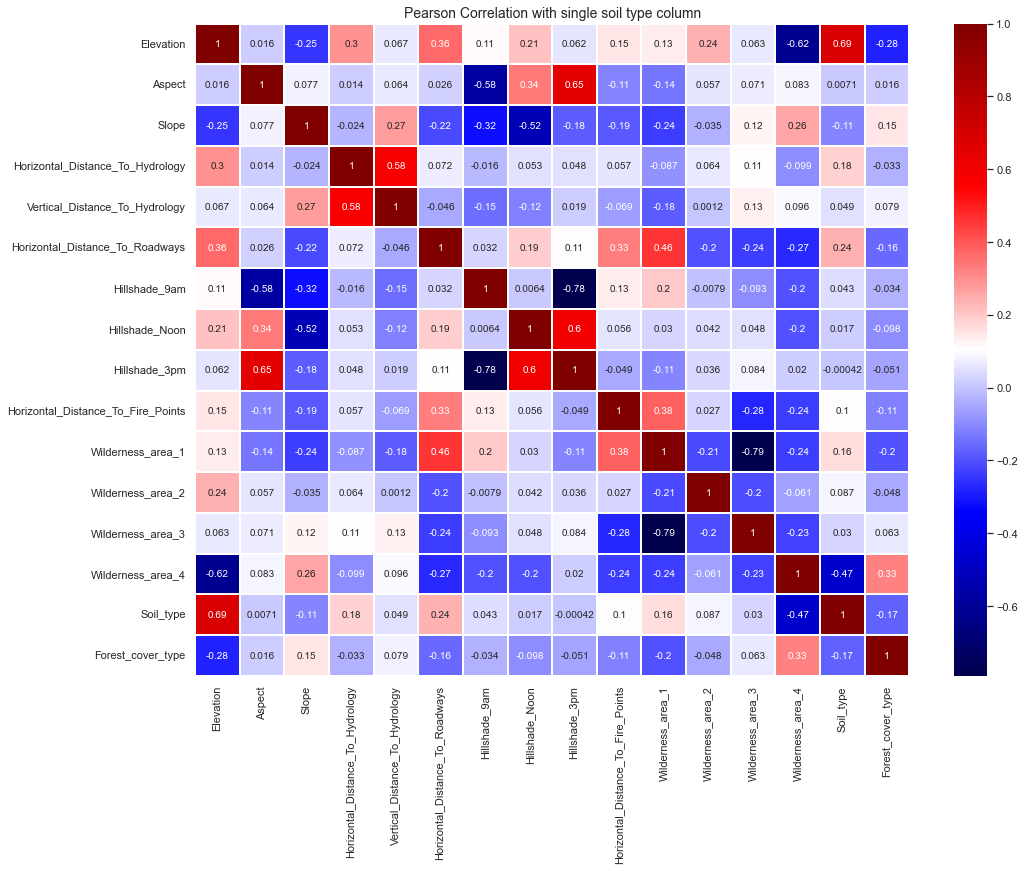

In [99]:
# Now check the heatmap
corr = df_cleaned_w_single_soil_type.corr()

plt.figure(figsize=(16, 12))
# plotting heatmap
colormap = plt.cm.seismic
sns.heatmap(corr,linewidths=0.1,
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation with single soil type column', size=14)

#### Analysis:
    Dataset have imbalanced labels or cover types. Spruce/fir and Lodgepole Pine are way higher in count than the rest.
    Need to take samples of balanced dataset to feed into classification algorithms for effective pattern recognization
    Different wilderness areas consist of some specific trees. Interestingly, there is one tree, Cottonwood/Willow,
    specifically likes to grow in wilderness area 4.
    Soil type columns are reverse-one-hot encoded to numeric columns and so the one-hot encoded columns of soil types are
    excluded. That also gives better pearson correlation with cover type
    Some wilderness areas, distance to hydrology, hillshades, aspect seems to have very weak correlation with cover types.
    Although most color in the cover column seems lighter which represents weak relation between features and target.
    Hillshade columns are collinear within each other and Hillshade_9am has the least importance in determining Cover_Type.
    Thus this column will be dropped for better interpretability.

#### Adding and transforming features might help with the correations

##### Firstly The horizontal and vertical distance to hydrology can be transformed to euclidean distance

In [100]:
df_cleaned_w_single_soil_type['Euclidian_Distance_To_Hydrology'] = (df_cleaned_w_single_soil_type['Horizontal_Distance_To_Hydrology']**2 + df_cleaned_w_single_soil_type['Vertical_Distance_To_Hydrology']**2)**0.5

#### Then taking sqrt of the right skewed slope variable

<AxesSubplot:xlabel='sqrt_slope', ylabel='Count'>

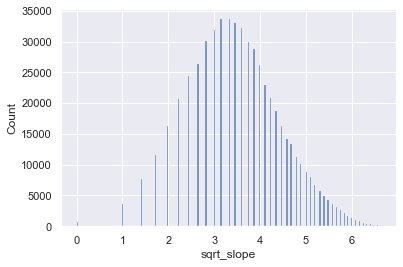

In [101]:
df_cleaned_w_single_soil_type['sqrt_slope'] = np.sqrt(df_cleaned_w_single_soil_type['Slope'])
sns.histplot(df_cleaned_w_single_soil_type['sqrt_slope'])

##### Taking the square root for the Horizontal distance to roadways

<AxesSubplot:xlabel='sqrt_Horizontal_Distance_To_Roadways', ylabel='Count'>

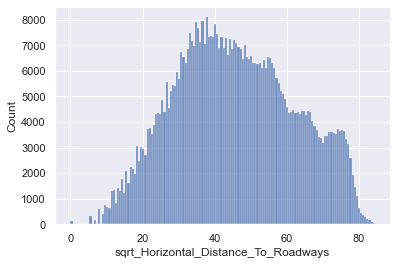

In [102]:
df_cleaned_w_single_soil_type['sqrt_Horizontal_Distance_To_Roadways'] = np.sqrt(df_cleaned_w_single_soil_type['Horizontal_Distance_To_Roadways'])
sns.histplot(df_cleaned_w_single_soil_type['sqrt_Horizontal_Distance_To_Roadways'])

##### Taking cube root of distance yto fire points as its giving the best distribution

<AxesSubplot:xlabel='cbrt_Horizontal_Distance_To_Fire_Points', ylabel='Count'>

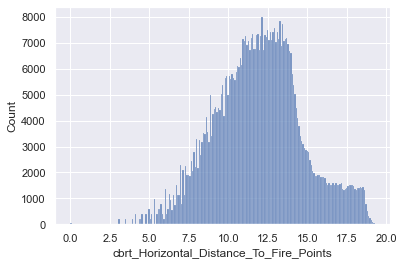

In [103]:
df_cleaned_w_single_soil_type['cbrt_Horizontal_Distance_To_Fire_Points'] = np.cbrt(df_cleaned_w_single_soil_type['Horizontal_Distance_To_Fire_Points'])
sns.histplot(df_cleaned_w_single_soil_type['cbrt_Horizontal_Distance_To_Fire_Points'])

In [104]:
# Mean of the hillshade columns
df_cleaned_w_single_soil_type['Mean_hillshade'] = (df_cleaned_w_single_soil_type['Hillshade_3pm'] + 
                                                  df_cleaned_w_single_soil_type['Hillshade_9am'] + 
                                                  df_cleaned_w_single_soil_type['Hillshade_Noon']) / 3

##### Taking Square of the Elevation

<AxesSubplot:xlabel='square_Elevation', ylabel='Count'>

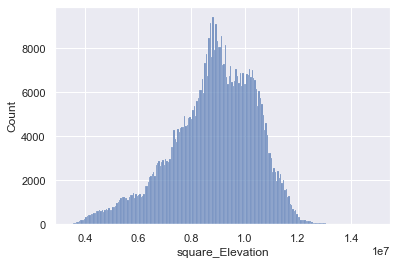

In [105]:
df_cleaned_w_single_soil_type['square_Elevation']  = np.square(df_cleaned_w_single_soil_type['Elevation'])
sns.histplot(df_cleaned_w_single_soil_type['square_Elevation'])

##### Dropping the Hillshade_9am

In [106]:
df_cleaned_w_single_soil_type = df_cleaned_w_single_soil_type.drop(['Hillshade_9am'], axis=1)
df_cleaned_w_single_soil_type.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_area_1', 'Wilderness_area_2', 'Wilderness_area_3',
       'Wilderness_area_4', 'Soil_type', 'Forest_cover_type',
       'Euclidian_Distance_To_Hydrology', 'sqrt_slope',
       'sqrt_Horizontal_Distance_To_Roadways',
       'cbrt_Horizontal_Distance_To_Fire_Points', 'Mean_hillshade',
       'square_Elevation'],
      dtype='object')

## Before feeding to classification algorithm, the dataset needs to be balanced according to the forest cover types or it could be oversampled using SMOTE. Many other types of feature engineering can be also done.
## A better way is to check with the original variables and then the transformed variables

In [109]:
# Checking with the new features
columns_transformed = ['Aspect',
       'Wilderness_area_1', 'Wilderness_area_2', 'Wilderness_area_3',
       'Wilderness_area_4', 'Soil_type',
       'Euclidian_Distance_To_Hydrology', 'sqrt_slope',
       'sqrt_Horizontal_Distance_To_Roadways',
       'cbrt_Horizontal_Distance_To_Fire_Points', 'Mean_hillshade', 'square_Elevation', 'Forest_cover_type',]

Text(0.5, 1.0, 'Pearson Correlation with single soil type column')

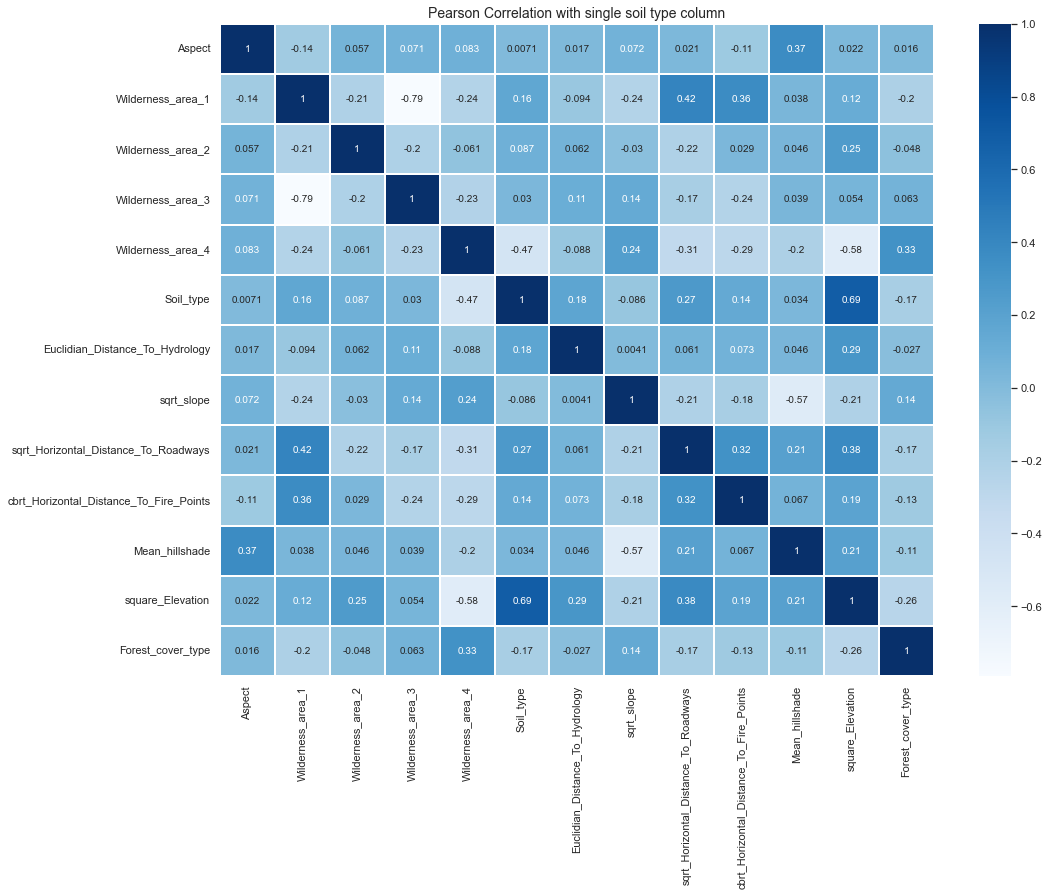

In [113]:
# Now check the heatmap
corr = df_cleaned_w_single_soil_type[columns_transformed].corr()

plt.figure(figsize=(16, 12))
# plotting heatmap
colormap = plt.cm.Blues
sns.heatmap(corr,linewidths=0.1,
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation with single soil type column', size=14)